<a href="https://colab.research.google.com/github/brunatoloti/data-science-do-zero/blob/main/Machine%20Learning/KNN/knn_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning - KNN



*   Algoritmo supervisionado



Importando bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Nesse notebook, utilizaremos o KNN para identificar dígitos escritos a mão.

Utilizaremos, para isso, um dataset fornecido pela biblioteca sklearn. Portanto, carregando a base de dados de dígitos.

In [2]:
from sklearn import datasets, svm, metrics

In [3]:
digits = datasets.load_digits()

Descrição da base de dados

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Visualizando os valores dos dados (pixels das imagens)

In [5]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

Visualizando os valores de classes - os valores de dígitos

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Visualizando as imagens e classes

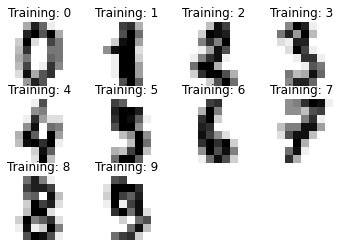

In [7]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
  plt.subplot(3, 4, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('Training: %i' %label)

Convertendo os dados em Dataframe

In [8]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
classe = digits.target

In [9]:
dataset = pd.DataFrame(data)
dataset['classe'] = classe

Cada linha do dataframe criado é uma imagem e cada coluna (tirando a coluna classe) é um valor de pixel daquela imagem. A coluna classe, logicamente, nos diz o dígito que corresponde àquela imagem.

In [12]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


Dividindo os dados em treino e teste

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns='classe'), dataset['classe'], test_size=0.3)

Verificando a forma dos dados

In [14]:
X_train.shape, X_test.shape

((1257, 64), (540, 64))

In [15]:
y_train.shape, y_test.shape

((1257,), (540,))

Instanciando o algoritmo KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

Treinando o algoritmo

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Executando o KNN com o conjunto de teste

In [18]:
resultado = knn.predict(X_test)

###Técnicas de Validação

Métricas de Classificação

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00        46
           3       0.96      0.96      0.96        54
           4       1.00      0.98      0.99        61
           5       1.00      0.98      0.99        51
           6       1.00      1.00      1.00        55
           7       0.98      1.00      0.99        57
           8       1.00      0.96      0.98        49
           9       0.93      1.00      0.97        42

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



Matriz de Confusão

In [20]:
print(pd.crosstab(y_test, resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                
0        60   0   0   0   0   0   0   0   0   0   60
1         0  65   0   0   0   0   0   0   0   0   65
2         0   0  46   0   0   0   0   0   0   0   46
3         0   0   0  52   0   0   0   1   0   1   54
4         0   0   0   0  60   0   0   0   0   1   61
5         0   0   0   0   0  50   0   0   0   1   51
6         0   0   0   0   0   0  55   0   0   0   55
7         0   0   0   0   0   0   0  57   0   0   57
8         0   0   0   2   0   0   0   0  47   0   49
9         0   0   0   0   0   0   0   0   0  42   42
All      60  65  46  54  60  50  55  58  47  45  540


Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, dataset.drop(columns='classe'), dataset['classe'], cv=5)
scores

array([0.95555556, 0.95833333, 0.96657382, 0.98328691, 0.96657382])

###Otimizando o parâmetro K

Importando o GridSearch

In [22]:
from sklearn.model_selection import GridSearchCV

Definindo a lista de valores para o parâmetro

In [25]:
k_list = list(range(1,31))

In [26]:
k_values = dict(n_neighbors=k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

Instanciando o objeto GridSearch

In [27]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

Treinando o objeto

In [28]:
grid.fit(dataset.drop(columns='classe'), dataset['classe'])

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Visualizando os valores de scores

In [30]:
grid.cv_results_

{'mean_fit_time': array([0.00998435, 0.01000562, 0.00995893, 0.0099052 , 0.01001196,
        0.01001105, 0.00980878, 0.01014247, 0.00990009, 0.01016479,
        0.01002908, 0.00999131, 0.01002479, 0.01034265, 0.00989108,
        0.01061525, 0.00989113, 0.00993352, 0.01027045, 0.00979681,
        0.01014504, 0.01021419, 0.00979772, 0.01008468, 0.01037602,
        0.01018295, 0.00990281, 0.00984311, 0.00987864, 0.01011229]),
 'mean_score_time': array([0.06854329, 0.07265258, 0.07201891, 0.07331676, 0.07310624,
        0.07282329, 0.07502513, 0.07384725, 0.07489343, 0.07443352,
        0.07505641, 0.07666249, 0.07861338, 0.0788619 , 0.07546792,
        0.07680979, 0.07577901, 0.07699327, 0.08080449, 0.07688184,
        0.07715483, 0.07596946, 0.07829685, 0.07735181, 0.07830472,
        0.07735596, 0.07686448, 0.07824593, 0.07753177, 0.07851272]),
 'mean_test_score': array([0.96439338, 0.96717115, 0.96606469, 0.96384092, 0.96272826,
        0.95938564, 0.95994584, 0.95827608, 0.95661096, 0

In [32]:
print(f'Melhor valor de k = {grid.best_params_} com o valor {grid.best_score_} de acurácia')

Melhor valor de k = {'n_neighbors': 2} com o valor 0.9671711544413494 de acurácia


Visualização dos valores de K e acurácia

In [39]:
scores = []
for score in grid.cv_results_['mean_test_score']:
  scores.append(score)

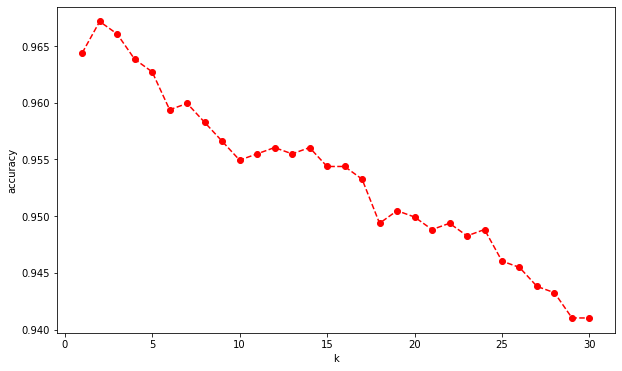

In [42]:
plt.figure(figsize=(10,6))
plt.plot(k_list,scores, color='red', linestyle='dashed', marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()